In [194]:
# You may have to install numpy, matplotlib, and adjustText using conda or pip
# before you can run this script.

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from adjustText import adjust_text

matplotlib.rcParams.update({'font.size': 14})  # Use larger font for plots.

In [195]:
v_e = 2550  # Saturn V exhaust velocity [m/s]
M = 250000  # Saturn V dry mass [kg]

planet_names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]
v_planet = np.array([4250, 10360, 11186, 5030, 60200, 36090, 21380, 23560, 1230])  # Planet escape velocities [m/s]
m_fuel_planets = np.array([M*(np.exp(v/v_e) - 1) for v in v_planet])  # Fuel needed to escape each planet [kg]

In [196]:
# Generate data to plot m_fuel vs. v curve.
v_curve = np.arange(0, 70000, 100)
m_fuel_curve = np.array([M*(np.exp(v/v_e) - 1) for v in v_curve])

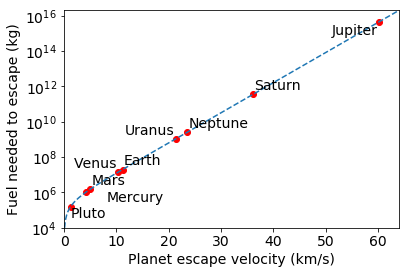

In [197]:
# Convert escape velocities from [m/s] to [km/s] for plotting.
v_curve = v_curve / 1000
v_planet = v_planet / 1000

# We'll plot on a semi-log y axis as there is a HUGE difference between the amounts of fuel
# needed for each planet.
plt.semilogy(v_curve, m_fuel_curve, linestyle="--")
plt.scatter(v_planet, m_fuel_planets, color="red")

plt.xlim([0, 64])
plt.ylim([1e4, 2e16])
plt.xlabel("Planet escape velocity (km/s)")
plt.ylabel("Fuel needed to escape (kg)")

# Place the planet names as labels for each point, and use adjust_text to automatically
# make sure the labels don't overlap.
texts = [plt.text(v_planet[i], m_fuel_planets[i], "{:s}".format(planet_names[i])) for i in range(len(planet_names))]
adjust_text(texts, expand_align=(1.1, 1.5))

plt.show()  # Uncomment to show interactive plot.
# plt.savefig("fuel_needed_planets.png", dpi=150, transparent=True)  # Uncomment to save high-resolution figure to disk.